In [1]:
import scipy.io as si
import numpy as np
import matplotlib.pyplot as plt

#load dataset
File = si.loadmat('ex7data1')
X = File['X']

#Visulaize the data
plt.plot(X[:,0],X[:,1],'o')

In [2]:
X[0]

array([3.38156267, 3.38911268])

# PCA 

In [3]:
#Normalize the dataset

def feature_normalize(X):
    
        mean_s = np.zeros((X.shape[1],1))
        std_s = np.zeros((X.shape[1],1))
    
        for i in range(X.shape[1]):
                mean_s[i] = mean = X[:,i].mean()
                std_s[i] = std_d = X[:,i].std()
                X[:,i] = (X[:,i] - mean)/std_d
                
        return X,mean_s,std_s

X_norm , mu , sigma = feature_normalize(X.copy())

In [4]:
#Compute Covariance Matrix Sigma and Eigen-Vector of that Sigma Matrix
from scipy import linalg #to compute SVD

def pca(X):
    #Covariance Matrix
    sigma =(1/len(X))*(np.dot(X.T,X))

    U,S,V = linalg.svd(sigma)
    return U,S
u,s = pca(X_norm)
print(u[:,0])

[-0.70710678 -0.70710678]


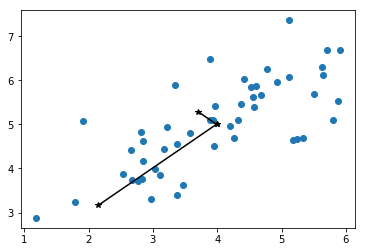

In [5]:
plt.plot(X[:,0],X[:,1],'o')

for i in range(u.shape[0]):
    pc = mu.ravel() + 1.5*s[i]*(u[:,i].ravel())
    x = np.array([mu[0][0],pc[0]])
    y = np.array([mu[1][0],pc[1]])
    plt.plot(x,y,'black',linewidth = 1.5,marker = '*')
    
plt.show()

# Dimension Reduction

In [6]:
def project_data(X,u,k):
    
    z = np.zeros((X.shape[1],k))
    u_reduce = u[:,0:k]
    
    z = np.matmul(X,u_reduce)
    return z

k = 1
Z = project_data(X_norm.copy(),u,k)
print(Z)

[[ 1.49631261]
 [-0.92218067]
 [ 1.22439232]
 [ 1.64386173]
 [ 1.2732206 ]
 [-0.97681976]
 [ 1.26881187]
 [-2.34148278]
 [-0.02999141]
 [-0.78171789]
 [-0.6316777 ]
 [-0.55280135]
 [-0.0896816 ]
 [-0.5258541 ]
 [ 1.56415455]
 [-1.91610366]
 [-0.88679735]
 [ 0.95607375]
 [-2.32995679]
 [-0.47793862]
 [-2.21747195]
 [ 0.38900633]
 [-1.78482346]
 [ 0.05175486]
 [ 1.66512392]
 [ 0.50813572]
 [-1.23711018]
 [-1.17198677]
 [ 0.84221686]
 [-0.00693174]
 [-0.22794195]
 [-1.51309518]
 [ 1.33874082]
 [-0.5925244 ]
 [ 0.67907605]
 [-1.35298   ]
 [ 1.68749495]
 [-1.39235931]
 [ 2.55992598]
 [-0.27850702]
 [-0.97677692]
 [ 0.88820006]
 [ 1.29666127]
 [-0.98966774]
 [ 1.81272352]
 [-0.27196356]
 [ 3.19297722]
 [ 1.21299151]
 [ 0.36792871]
 [-1.44264131]]


# Reconstructing an approximation of the data

In [7]:
def recover_data(z,u,k):
    
    u_reduce = u[:,0:k]
    rec = np.zeros((z.shape[0] , u.shape[0]))
    rec = np.dot(z,u_reduce.T)
    return rec

X_rec = recover_data(Z,u,k)
print(X_rec[0])

[-1.05805279 -1.05805279]


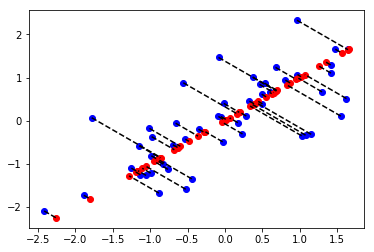

In [8]:
plt.plot(X_norm[:,0],X_norm[:,1],'bo')
plt.plot(X_rec[:,0],X_rec[:,1],'ro')

#draw line between Original data and reduced data (red - reduced , blue - original)
for i in range(len(X_norm)):
    x = np.array([X_norm[i][0],X_rec[i][0]])
    y = np.array([X_norm[i][1],X_rec[i][1]])
    plt.plot(x,y,'k--')

# Loading and Visualizing Face Data

In [30]:
#load face data
File2 = si.loadmat('ex7faces.mat')
Face_data = File2['X']

#visualize face data
def display_data(img_data,total):
    
    dim = int(np.sqrt(img_data.shape[1]))
    dim1 = int(np.sqrt(total))
    
    #create array to store images
    display = np.zeros((dim*dim1,dim*dim1))

    rows = 0
    cols = 0

    for data in range(total):
        #create matrix of image from selected training data-sets
        #Transpose the data 
        temp = np.array(img_data[data]).reshape(dim,dim).T
    
        #check if the first row of display array is filled or not
        if cols == int(np.sqrt(total)):
            cols = 0
            rows += 1
    
        #copy data of temp into display array
        display[rows*dim:rows*dim + dim,cols*dim:cols*dim + dim] = temp
        cols += 1

        #plot display as images
        plt.axis('off')
        plt.imshow(display,cmap='gray',interpolation = 'gaussian')

display_data(Face_data,100)

In [22]:
#normalize Face data and run PCA On normalized Face data
Face_data_norm , mu_i , sigma_i = feature_normalize(Face_data.copy())
u_face,s_face = pca(Face_data_norm)

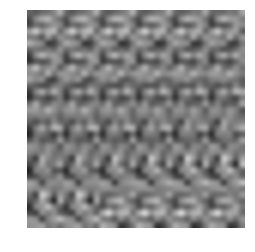

In [31]:
#display First 36 PCA componenets
display_data(u_face[:,0:36],36)

In [32]:
#Project Normalize Face data on first 100 PCA componenets
k_face = 100
Z_face = project_data(Face_data_norm.copy(),u_face,k_face)
print(Z_face.shape)

(5000, 100)


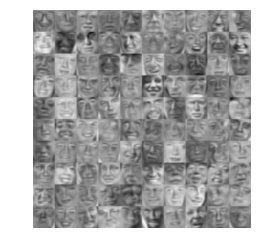

In [33]:
#recover and display original data from PCA componenets
Face_rec = recover_data(Z_face,u_face,k_face)
display_data(Face_rec,100)

# Optional (ungraded) exercise: PCA for visualization

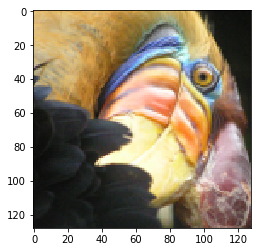

In [34]:
#load image using .png file
import imageio

Image = imageio.imread('bird_small.png')

#to get all values in a range 0-1
Image = Image / 255
plt.imshow(Image)

img_size = Image.shape

In [44]:
from sklearn.utils import shuffle #to shuffle an array

#initalize centroids randomly
def kMeansInitCentroids(X, K):
    centroids = shuffle(X)
    return centroids[:K,:]
    
    ''''centroids = np.zeros((K,X.shape[1]))
    randidx = np.random.permutation(len(X))
    centroids = X[randidx[0:K],:]'''
    
    return centroids

#Run K-Means Algorithm plot graph to show how position of centroids change in every iteration
def runkMeans(X, initial_centroids, max_iters , plot_progress,l):
    
    idx = np.zeros((len(X),1))
    K = len(initial_centroids)
    centroids = initial_centroids
    #plt.figure(figsize = (9,7))
    previous_centroids = np.zeros((max_iters +1,initial_centroids.shape[0]*initial_centroids.shape[1]))
    previous_centroids[0] = centroids.ravel()
    
    for i in range(max_iters):
        
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X, idx, K)
        previous_centroids[i+1] = centroids.ravel()
    
    if plot_progress == True:
        
        j = 0
        for i in range(1,K+1):
            
            #plot-dataset
            temp = X[np.where(idx == i)]
            plt.scatter(temp[:,0],temp[:,1])
        
            #plot history of centroids
            plt.plot(previous_centroids[:,i + j - 1],previous_centroids[:,i + j],'black',linewidth = 1.75,marker = '*')
            j = j + l
    
    return centroids , idx

#find closet centroids for each training data (cluster assignment step)
def  findClosestCentroids(X, initial_centroids):
    
    idx = np.zeros((len(X),1))
    temp = np.zeros((len(X),initial_centroids.shape[0]))
    
    for i in range(initial_centroids.shape[0]):
        
        #calculate distance between two points
        temp[:,i] = ((X - initial_centroids[i])**2).sum(axis = 1)
    
    idx = np.argmin(temp,axis = 1) + 1
    return idx

#Compute means (second step of K-means algorithm)
def computeCentroids(X, idx, K):
    
    centroids = np.zeros((K,X.shape[1]))
    
    for i in range(1,K + 1):
        temp = X[np.where(idx == i)]
        centroids[i-1] = temp.mean(0)
    
    return centroids

In [45]:
#reshape our image into a M*3 matrix where each row gives value of RGB for each pixel
img_mat = np.array(Image).reshape(img_size[0]*img_size[1],img_size[2])
print(img_mat.shape)

K_n = 16
max_iters = 10
n_init_cluster_centroid = kMeansInitCentroids(img_mat, K_n)

centroids, idx = runkMeans(img_mat, n_init_cluster_centroid, max_iters,False,2)
print(centroids)

(16384, 3)
[[0.83962214 0.59036167 0.28619171]
 [0.95661868 0.83781335 0.59894515]
 [0.97836162 0.94114237 0.80126792]
 [0.5062165  0.41328692 0.35844065]
 [0.07979426 0.08645032 0.07609064]
 [0.55198649 0.69784828 0.86005728]
 [0.8509478  0.70339905 0.44446038]
 [0.13828638 0.14530482 0.1368389 ]
 [0.62667715 0.53533644 0.44600689]
 [0.32186353 0.30695529 0.32313725]
 [0.45653942 0.32662703 0.18563308]
 [0.83486288 0.75770501 0.74992925]
 [0.6604093  0.48154291 0.21301189]
 [0.23423653 0.21420797 0.20335418]
 [0.70714506 0.63806591 0.58166513]
 [0.38395592 0.44847574 0.61426936]]


<IPython.core.display.Javascript object>


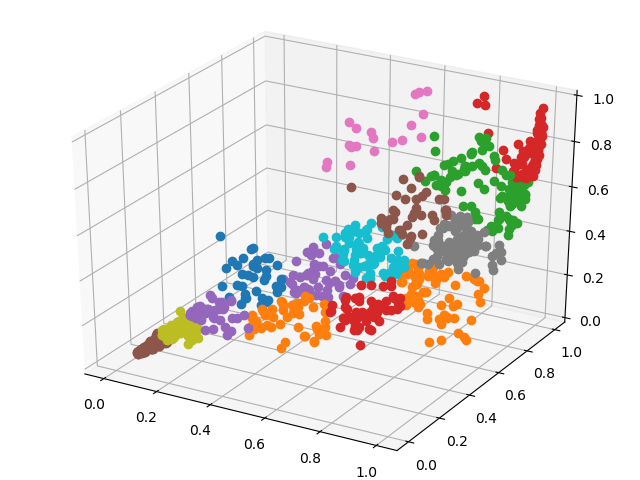

In [109]:
from mpl_toolkits.mplot3d import Axes3D
import random

%matplotlib notebook

#select 1000 random indexes
sel =  random.sample(range(0, img_mat.shape[0]), 1000)

fig = plt.figure()
ax = Axes3D(fig)

plot_data = img_mat[sel]

for i in range(K_n):
    temp = plot_data[np.where(idx[sel] == i)]
    ax.plot(temp[:,0],temp[:,1],temp[:,2],'o')
plt.show()

# 8(b) : Reduce dimension of Image

In [84]:
#normalize Image data and run PCA On normalized Face data
img_mat_norm , mu_image , sigma_image = feature_normalize(img_mat.copy())
u_image,s_image = pca(img_mat_norm)

In [86]:
#Project Normalize Image data on first 2 PCA componenets
k_img = 2
Z_img = project_data(img_mat_norm.copy(),u_image,k_img)
print(Z_img.shape)

(16384, 2)


<IPython.core.display.Javascript object>


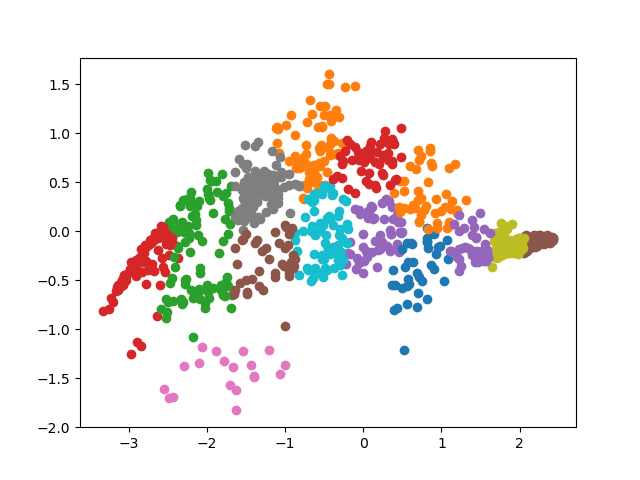

In [110]:
#Visulaize 2D projected data
fig1 = plt.figure()

plot_data_1 = Z_img[sel]

for i in range(K_n):
    temp = plot_data_1[np.where(idx[sel] == i)]
    plt.plot(temp[:,0],temp[:,1],'o')
    
plt.show()